In [2]:
import pandas as pd

In [3]:
weather = pd.read_csv("C:/Users/swara/OneDrive/Documents/data science projects/weather prediction ML/data.csv", index_col="DATE")

In [4]:
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#  getting out data ready

In [5]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.668463
ACSH       0.668463
AWND       0.500482
DAPR       0.999546
FMTM       0.875759
FRGT       0.999887
MDPR       0.999546
PGTM       0.517104
PRCP       0.016112
SNOW       0.354400
SNWD       0.347365
TAVG       0.884439
TMAX       0.000624
TMIN       0.000794
TSUN       0.934702
WDF1       0.668463
WDF2       0.500425
WDF5       0.505418
WDFG       0.757928
WSF1       0.668463
WSF2       0.500369
WSF5       0.505418
WSFG       0.757928
WT01       0.776423
WT02       0.980201
WT03       0.992568
WT04       0.999773
WT05       0.998355
WT07       0.999887
WT08       0.815907
WT09       0.999887
WT16       0.889091
WT18       0.999830
dtype: float64

#  renaming our data columns

In [6]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [7]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.00,0.0,0.0,49.0,30.0
1960-01-02,0.00,0.0,0.0,49.0,29.0
1960-01-03,0.00,0.0,0.0,54.0,35.0
1960-01-04,0.00,0.0,0.0,54.0,36.0
1960-01-05,0.00,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2024-03-01,0.47,NaN,NaN,58.0,50.0
2024-03-02,0.35,NaN,NaN,55.0,45.0
2024-03-03,0.39,NaN,NaN,54.0,45.0


## filling in missing values 

In [8]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.016112
snow          0.354400
snow_depth    0.347365
temp_max      0.000624
temp_min      0.000794
dtype: float64

In [9]:
core_weather["snow"].value_counts()

snow
0.0    11379
1.0        1
Name: count, dtype: int64

In [10]:
core_weather["snow_depth"].value_counts()

snow_depth
0.0    11504
Name: count, dtype: int64

In [11]:
del core_weather["snow"]

In [12]:
del core_weather["snow_depth"]

In [13]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2016-05-08,NaN,67.0,56.0
2017-10-28,NaN,68.0,50.0
2023-03-29,NaN,52.0,43.0


In [14]:
core_weather.loc["1983-10-20":"1983-11-05",:]

,precip,temp_max,temp_min
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


In [15]:
core_weather["precip"].value_counts()

precip
0.00    14302
0.01      444
0.02      204
0.03      126
0.05      105
        ...  
1.38        1
1.95        1
2.01        1
1.41        1
1.28        1
Name: count, Length: 179, dtype: int64

In [16]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [17]:
core_weather[pd.isnull(core_weather["temp_max"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [18]:
core_weather = core_weather.fillna(method="ffill")

In [19]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

#  verifying if we have correct data types

In [22]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [23]:
core_weather.index


Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2024-02-25', '2024-02-26', '2024-02-27', '2024-02-28', '2024-02-29',
       '2024-03-01', '2024-03-02', '2024-03-03', '2024-03-04', '2024-03-05'],
      dtype='object', name='DATE', length=17627)

In [24]:
core_weather.index = pd.to_datetime(core_weather.index)

In [25]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2024-02-25', '2024-02-26', '2024-02-27', '2024-02-28',
               '2024-02-29', '2024-03-01', '2024-03-02', '2024-03-03',
               '2024-03-04', '2024-03-05'],
              dtype='datetime64[ns]', name='DATE', length=17627, freq=None)

#  analysing our data

<Axes: xlabel='DATE'>

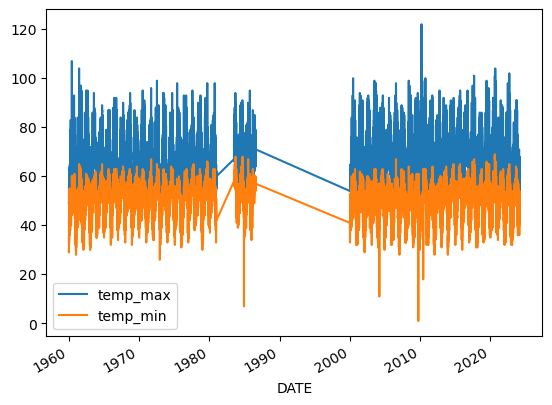

In [28]:
core_weather[["temp_max", "temp_min"]].plot()

In [29]:
core_weather.index.year.value_counts()

DATE
1960    366
1968    366
2008    366
1984    366
1980    366
1976    366
1972    366
2016    366
2004    366
2020    366
1964    366
2018    365
2010    365
2005    365
2006    365
2007    365
2023    365
2022    365
2009    365
2011    365
2017    365
2012    365
2021    365
2013    365
2003    365
2015    365
2019    365
2014    365
2000    365
2002    365
1973    365
1962    365
1963    365
1965    365
1966    365
1967    365
1969    365
1970    365
1971    365
1974    365
2001    365
1975    365
1977    365
1978    365
1979    365
1985    365
1961    365
1986    212
1983    184
2024     65
Name: count, dtype: int64

<Axes: xlabel='DATE'>

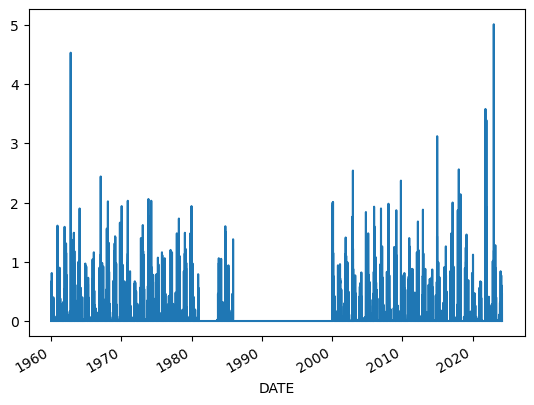

In [30]:
core_weather["precip"].plot()

In [33]:
core_weather.groupby(core_weather.index.year).sum()

,precip,temp_max,temp_min
DATE,,,
1960,14.01,24135.0,17973.0
1961,13.87,24202.0,17819.0
1962,22.47,23785.0,17880.0
1963,19.11,23470.0,18237.0
1964,16.83,23013.0,18637.0
1965,16.32,23181.0,18715.0
1966,13.11,23680.0,18991.0
1967,23.98,23433.0,18668.0
1968,17.19,23634.0,18859.0


#  training our model

In [34]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2024-03-01,0.47,58.0,50.0,55.0
2024-03-02,0.35,55.0,45.0,54.0
2024-03-03,0.39,54.0,45.0,57.0


In [35]:
core_weather = core_weather.iloc[:-1,:].copy()

In [36]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2024-02-29,0.14,61.0,49.0,58.0
2024-03-01,0.47,58.0,50.0,55.0
2024-03-02,0.35,55.0,45.0,54.0


In [37]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=1)


In [39]:
predictors = ["precip", "temp_max", "temp_min"]
train = core_weather.loc[:"2023-12-31"]
test = core_weather.loc["2024-01-01":]

In [41]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=1)

In [42]:
predictions = reg.predict(test[predictors])

In [43]:
from sklearn.metrics import mean_absolute_error

In [44]:
mean_absolute_error(test["target"], predictions)

2.3454923148262017

#  evaluating our model

In [47]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [48]:
combined

,actual,predictions
DATE,,
2024-01-01,62.0,59.261913
2024-01-02,59.0,61.460119
2024-01-03,58.0,60.166147
2024-01-04,61.0,58.722902
2024-01-05,56.0,61.245741
...,...,...
2024-02-29,58.0,61.835615
2024-03-01,55.0,59.124657
2024-03-02,54.0,56.327216


<Axes: xlabel='DATE'>

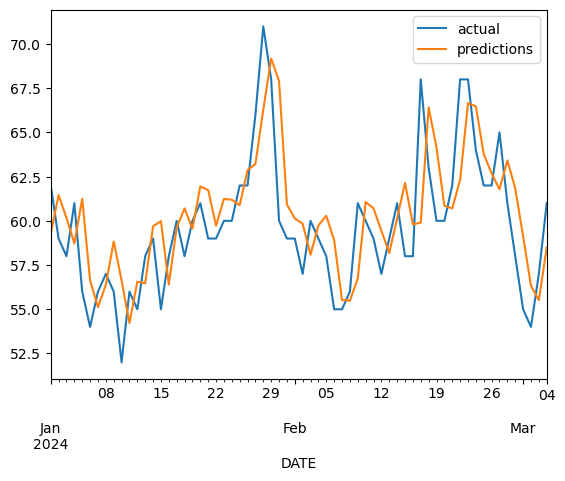

In [49]:
combined.plot()

In [50]:
reg.coef_

array([-2.20342536,  0.72116606,  0.17967066])

#  creating a function to make predictions

In [52]:
def create_predictions(predictions, core_weather,reg):
    train = core_weather.loc[:"2023-12-31"]
    test = core_weather.loc["2024-01-01":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error= mean_absolute_error(test["target"], predictions)
    combined= pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual","preddictions"]
    return error, combined
    

In [53]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()
core_weather

,precip,temp_max,temp_min,target,month_max
DATE,,,,,
1960-01-01,0.00,49.0,30.0,49.0,NaN
1960-01-02,0.00,49.0,29.0,54.0,NaN
1960-01-03,0.00,54.0,35.0,54.0,NaN
1960-01-04,0.00,54.0,36.0,55.0,NaN
1960-01-05,0.00,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2024-02-29,0.14,61.0,49.0,58.0,60.466667
2024-03-01,0.47,58.0,50.0,55.0,60.400000
2024-03-02,0.35,55.0,45.0,54.0,60.266667


In [56]:
core_weather["month_day_max"] = core_weather["temp_max"] / core_weather["temp_min"]
predictions = ["precip", "temp_max", "temp_min", "month_day_max","max_min"]
core_weather = core_weather.iloc[30:,:].copy()

In [57]:
error, combined = create_predictions(predictions, core_weather, reg)

In [58]:
error

2.3574414343107555

<Axes: xlabel='DATE'>

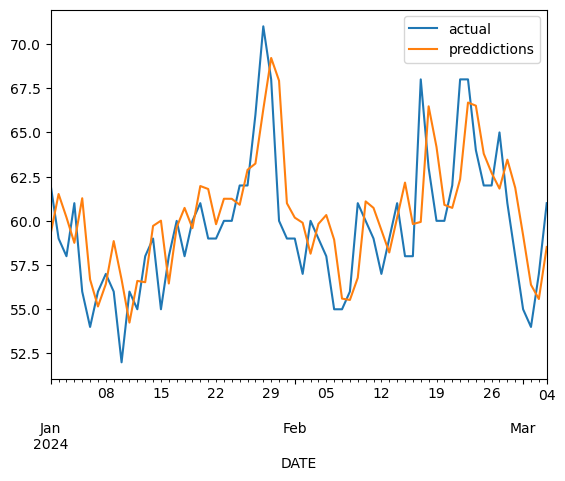

In [59]:
combined.plot()